In [1]:
import cv2
import torch
import json
import urllib.request
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import torchvision.models as models
from torchvision.models import resnet18
from matplotlib import pyplot as plt
from torchvision import transforms


d:\New folder\Project\ProjectData\Data Science\datascience\Lib\site-packages\tensorflow_hub\__init__.py:61: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import parse_version


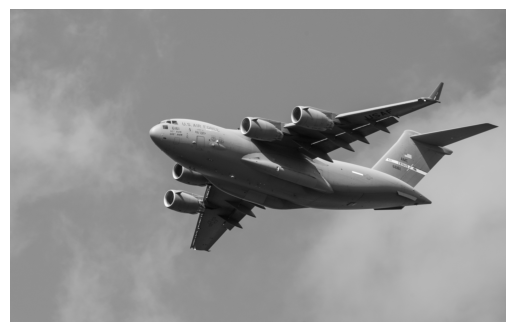

In [2]:
image = cv2.imread("images/plane.jpg",cv2.IMREAD_GRAYSCALE)
plt.imshow(image,cmap="gray"),plt.axis("off")
plt.show()

In [3]:
type(image)

numpy.ndarray

In [4]:
image

array([[140, 136, 146, ..., 132, 139, 134],
       [144, 136, 149, ..., 142, 124, 126],
       [152, 139, 144, ..., 121, 127, 134],
       ...,
       [156, 146, 144, ..., 157, 154, 151],
       [146, 150, 147, ..., 156, 158, 157],
       [143, 138, 147, ..., 156, 157, 157]],
      shape=(2270, 3600), dtype=uint8)

In [5]:
image.shape

(2270, 3600)

In [6]:
image[0,0]

np.uint8(140)

In [7]:
image_bgr = cv2.imread("images/plane.jpg",cv2.IMREAD_COLOR)
image_bgr[0,0]

array([195, 144, 111], dtype=uint8)

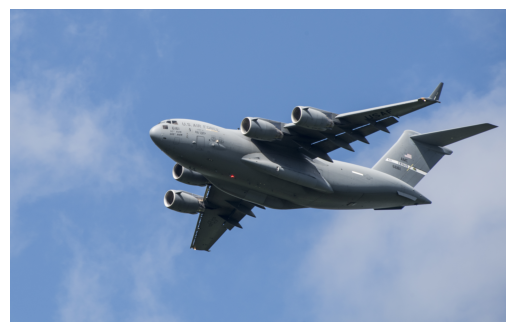

In [8]:
image_rgb = cv2.cvtColor(image_bgr,cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb),plt.axis("off")
plt.show()

8.2 : Saving Images

In [9]:
image = cv2.imread("images/plane.jpg",cv2.IMREAD_GRAYSCALE)
cv2.imwrite("images/plane_new.jpg",image)

True

8.3 : Resizing Images

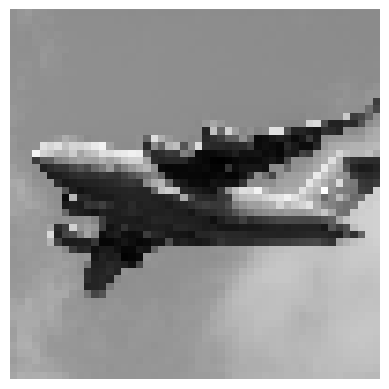

In [10]:
image = cv2.imread("images/plane_256x256.jpg",cv2.IMREAD_GRAYSCALE)
image_50x50 = cv2.resize(image,(50,50))
plt.imshow(image_50x50,cmap="gray"),plt.axis("off")
plt.show()

8.4 : Cropping Images

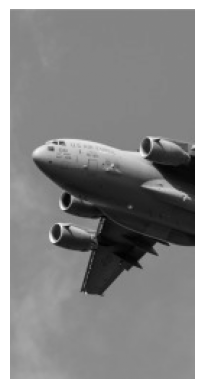

In [11]:
image = cv2.imread("images/plane_256x256.jpg",cv2.IMREAD_GRAYSCALE)
image_cropped = image[:,:128]
plt.imshow(image_cropped,cmap="gray"),plt.axis("off")
plt.show()

8.5 : Blurring Images

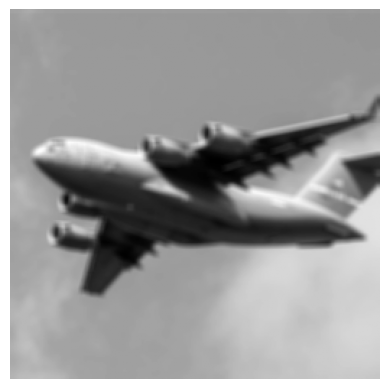

In [12]:
image = cv2.imread("images/plane_256x256.jpg",cv2.IMREAD_GRAYSCALE)
image_blurry = cv2.blur(image,(5,5))
plt.imshow(image_blurry,cmap="gray"),plt.axis("off")
plt.show()

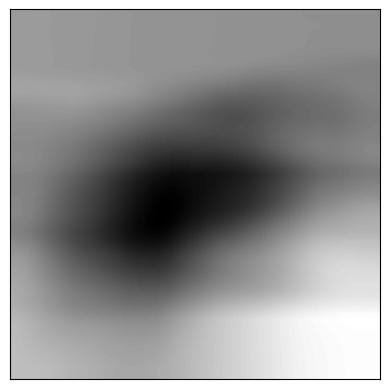

In [13]:
image_very_blurry = cv2.blur(image,(100,100))
plt.imshow(image_very_blurry,cmap="gray"),plt.xticks([]),plt.yticks([])
plt.show()

Discussion

In [14]:
kernel = np.ones((5,5,))/25.0
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

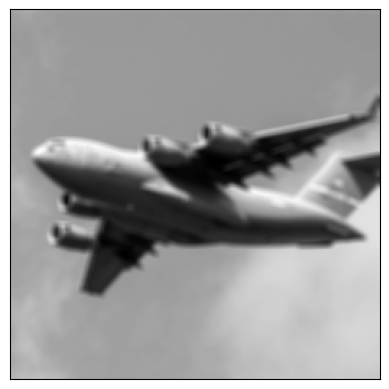

In [15]:
image_kernel = cv2.filter2D(image,-1,kernel)
plt.imshow(image_kernel,cmap="gray"),plt.xticks([]),plt.yticks([])
plt.show()

8.6 : Sharpening Images

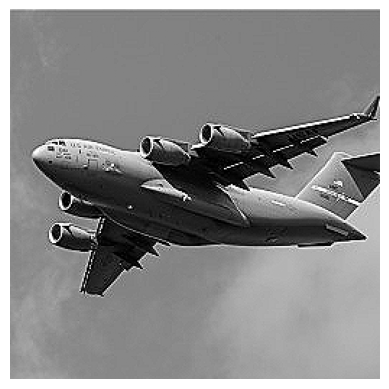

In [16]:
image = cv2.imread("images/plane_256x256.jpg",cv2.IMREAD_GRAYSCALE)
kernel= np.array([[0,-1,0],
                  [-1,5,-1],
                  [0,-1,0]])
image_sharp = cv2.filter2D(image,-1,kernel)
plt.imshow(image_sharp,cmap="gray"),plt.axis("off")
plt.show()

8.7 : Enhancing Contrast

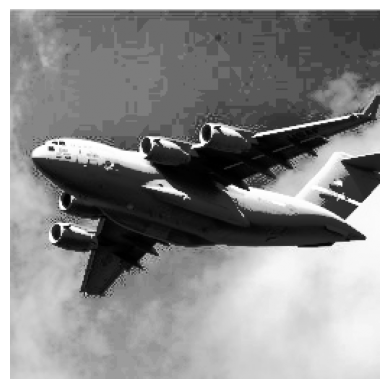

In [17]:
image = cv2.imread("images/plane_256x256.jpg",cv2.IMREAD_GRAYSCALE)
image_enhanced = cv2.equalizeHist(image)
plt.imshow(image_enhanced,cmap="gray"),plt.axis("off")
plt.show()

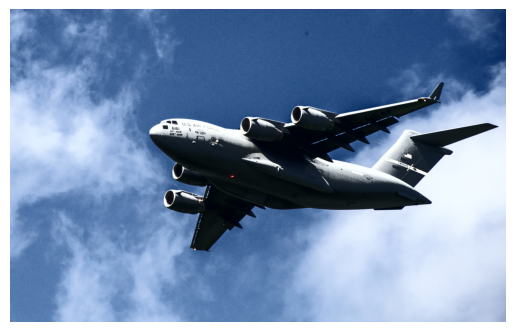

In [18]:
image_bgr = cv2.imread("images/plane.jpg")
image_yuv = cv2.cvtColor(image_bgr,cv2.COLOR_BGR2YUV)
image_yuv[:,:,0] = cv2.equalizeHist(image_yuv[:,:,0])
image_rgb = cv2.cvtColor(image_yuv,cv2.COLOR_YUV2RGB)
plt.imshow(image_rgb),plt.axis("off")
plt.show()

8.8 : Isolating Colors

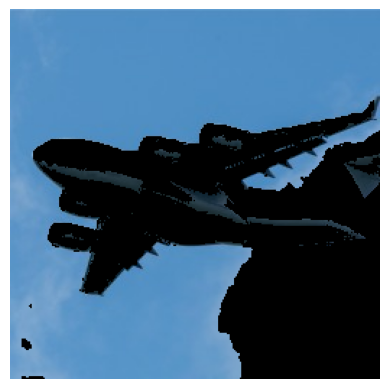

In [19]:
image_bgr = cv2.imread('images/plane_256x256.jpg')
image_hsv = cv2.cvtColor(image_bgr,cv2.COLOR_BGR2HSV)
lower_blue = np.array([50,100,50])
upper_blue = np.array([130,255,255])
mask = cv2.inRange(image_hsv,lower_blue,upper_blue)
image_bgr_masked = cv2.bitwise_and(image_bgr,image_bgr,mask=mask)
image_rgb = cv2.cvtColor(image_bgr_masked,cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb),plt.axis("off")
plt.show()

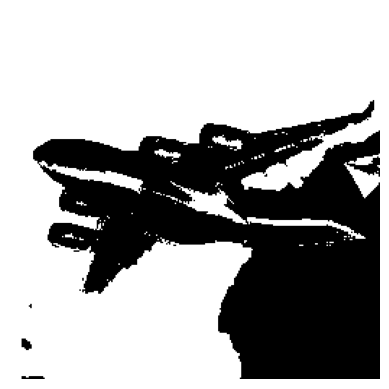

In [20]:
plt.imshow(mask,cmap="gray"),plt.axis("off")
plt.show()

8.9 : Binarizing Images

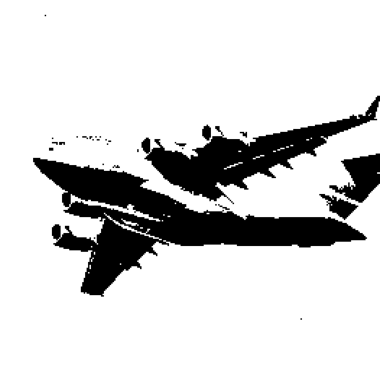

In [21]:
image_grey = cv2.imread('images/plane_256x256.jpg',cv2.IMREAD_GRAYSCALE)
max_output_value = 255
neighborhood_size = 99
subtract_from_mean = 10
image_binarized = cv2.adaptiveThreshold(image_grey,
                                        max_output_value,
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY,
                                        neighborhood_size,
                                        subtract_from_mean)

plt.imshow(image_binarized,cmap="gray"),plt.axis("off")
plt.show()

Discussion

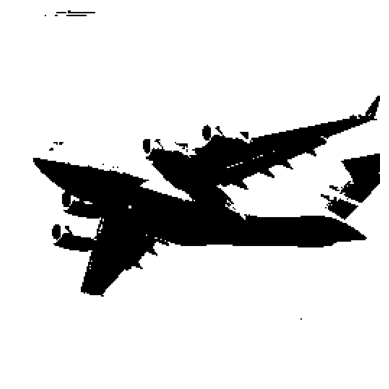

In [22]:
image_mean_threshold = cv2.adaptiveThreshold(image_grey,
                                             max_output_value,
                                             cv2.ADAPTIVE_THRESH_MEAN_C,
                                             cv2.THRESH_BINARY,
                                             neighborhood_size,
                                             subtract_from_mean)

plt.imshow(image_mean_threshold,cmap="gray"),plt.axis("off")
plt.show()

8.10 : Removing Backgrounds

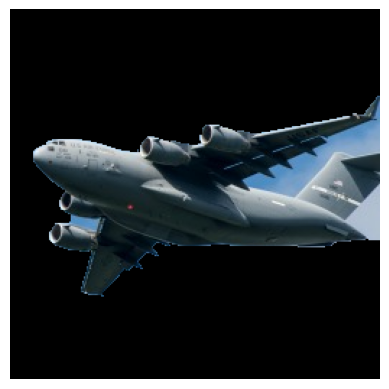

In [23]:
image_bgr = cv2.imread('images/plane_256x256.jpg')
image_rgb = cv2.cvtColor(image_bgr,cv2.COLOR_BGR2RGB)
rectangle = (0,56,256,150)
mask = np.zeros(image_rgb.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

cv2.grabCut(image_rgb,
            mask,
            rectangle,
            bgdModel,
            fgdModel,
            5,
            cv2.GC_INIT_WITH_RECT

)
mask_2 = np.where((mask==2) | (mask==0),0,1).astype('uint8')
image_rgb_nobg = image_rgb * mask_2[:,:,np.newaxis]

plt.imshow(image_rgb_nobg),plt.axis("off")
plt.show()

Discussion

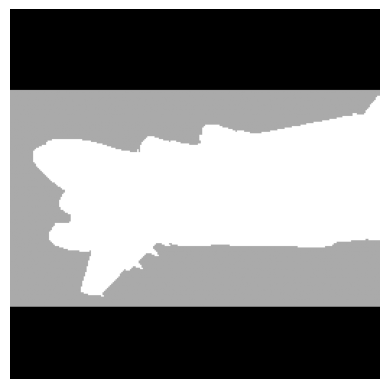

In [24]:
plt.imshow(mask,cmap='gray'),plt.axis("off")
plt.show()

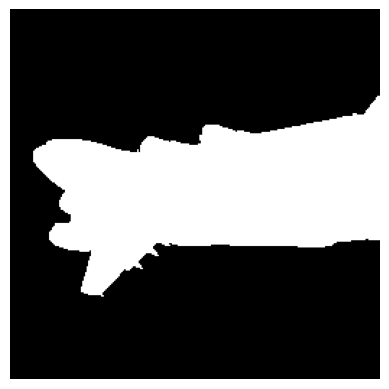

In [25]:
plt.imshow(mask_2,cmap="gray"),plt.axis("off")
plt.show()

8.11 : Detecting Edges

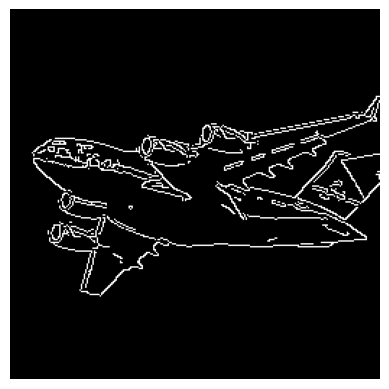

In [26]:
image_gray = cv2.imread("images/plane_256x256.jpg",cv2.IMREAD_GRAYSCALE)
median_intensity = np.median(image_gray)

lower_threshold = int(max(0,(1.0-0.33) * median_intensity))
upper_threshold = int(min(255,(1.0+0.33)*median_intensity))
image_canny = cv2.Canny(image_gray,lower_threshold,upper_threshold)
plt.imshow(image_canny,cmap="gray"),plt.axis("off")
plt.show()

8.12 : Detecting Corners

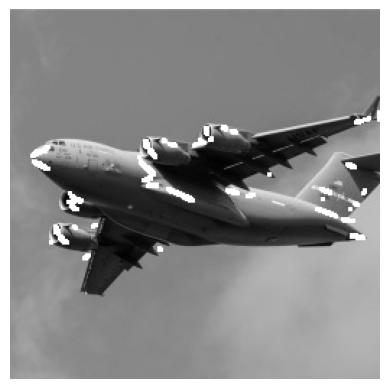

In [27]:
image_bgr = cv2.imread("images/plane_256x256.jpg")
image_gray = cv2.cvtColor(image_bgr,cv2.COLOR_BGR2GRAY)
image_gray = np.float32(image_gray)

block_size = 2
aperture = 29
free_parameter = 0.04
detector_responses = cv2.cornerHarris(image_gray,
                                      block_size,
                                      aperture,
                                      free_parameter)

detector_responses = cv2.dilate(detector_responses,None)
threshold = 0.02
image_bgr[detector_responses > threshold * detector_responses.max()] = [255,255,255]

image_gray = cv2.cvtColor(image_bgr,cv2.COLOR_BGR2GRAY)

plt.imshow(image_gray,cmap="gray"),plt.axis("off")
plt.show()


Discussion

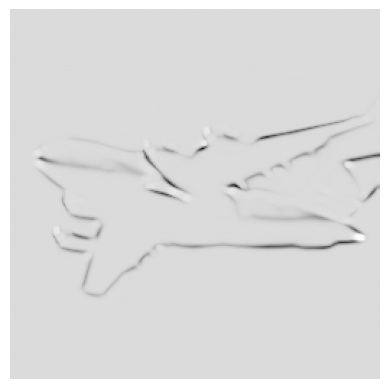

In [28]:
plt.imshow(detector_responses,cmap="gray"),plt.axis("off")
plt.show()

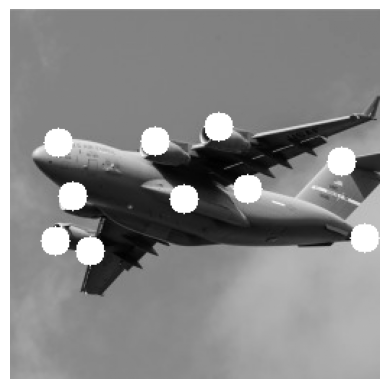

In [29]:
image_bgr = cv2.imread('images/plane_256x256.jpg')
image_gray = cv2.cvtColor(image_bgr,cv2.COLOR_BGR2GRAY)
corners_to_detect = 10
minimum_quality_score = 0.05
minimum_distance = 25

corners = cv2.goodFeaturesToTrack(image_gray,
                                 corners_to_detect,
                                 minimum_quality_score,
                                 minimum_distance
                                 )
corners = np.int16(corners)

for corner in corners:
    x,y = corner[0]
    cv2.circle(image_bgr,(x,y),10,(255,255,255),-1)

image_rgb = cv2.cvtColor(image_bgr , cv2.COLOR_BGR2GRAY)

plt.imshow(image_rgb,cmap='gray'),plt.axis("off")
plt.show()

8.13 : Creating Features for Machine Learning

In [30]:
image = cv2.imread("images/plane_256x256.jpg",cv2.IMREAD_GRAYSCALE)

image_10x10 = cv2.resize(image,(10,10))

image_10x10.flatten()

array([133, 130, 130, 129, 130, 129, 129, 128, 128, 127, 135, 131, 131,
       131, 130, 130, 129, 128, 128, 128, 134, 132, 131, 131, 130, 129,
       129, 128, 130, 133, 132, 158, 130, 133, 130,  46,  97,  26, 132,
       143, 141,  36,  54,  91,   9,   9,  49, 144, 179,  41, 142,  95,
        32,  36,  29,  43, 113, 141, 179, 187, 141, 124,  26,  25, 132,
       135, 151, 175, 174, 184, 143, 151,  38, 133, 134, 139, 174, 177,
       169, 174, 155, 141, 135, 137, 137, 152, 169, 168, 168, 179, 152,
       139, 136, 135, 137, 143, 159, 166, 171, 175], dtype=uint8)

Discussion

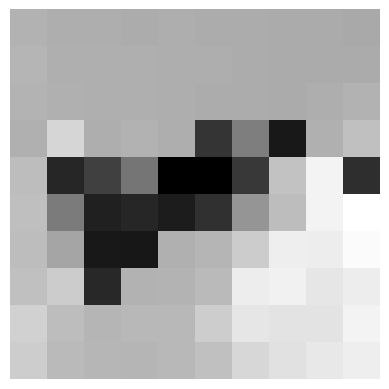

In [31]:
plt.imshow(image_10x10,cmap="gray"),plt.axis("off")
plt.show()

In [32]:
image_10x10.shape

(10, 10)

In [33]:
image_10x10.flatten().shape

(100,)

In [34]:
image_color = cv2.imread("images/plane_256x256.jpg",cv2.IMREAD_COLOR)
image_color_10x10 = cv2.resize(image_color,(10,10))
image_color_10x10.flatten().shape

(300,)

In [35]:
image_256x256_gray = cv2.imread("images/plane_256x256.jpg" , cv2.IMREAD_GRAYSCALE)
image_256x256_gray.flatten().shape

(65536,)

In [36]:
image_256x256_color = cv2.imread("images/plane_256x256.jpg",cv2.IMREAD_COLOR)
image_256x256_color.flatten().shape

(196608,)

8.14 : Encoding Color Histograms as Features

In [37]:
np.random.seed(0)
image_bgr = cv2.imread("images/plane_256x256.jpg",cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image_bgr,cv2.COLOR_BGR2RGB)
features = []
colors = ("r","g","b")

for i , channel in enumerate(colors):
    histogram = cv2.calcHist([image_rgb],
                             [i],
                             None,
                             [256],
                             [0,256])
    features.extend(histogram)

observation = np.array(features).flatten()
observation[0:5]

array([1027.,  217.,  182.,  146.,  146.], dtype=float32)

Discussion

In [38]:
image_rgb[0,0]

array([107, 163, 212], dtype=uint8)

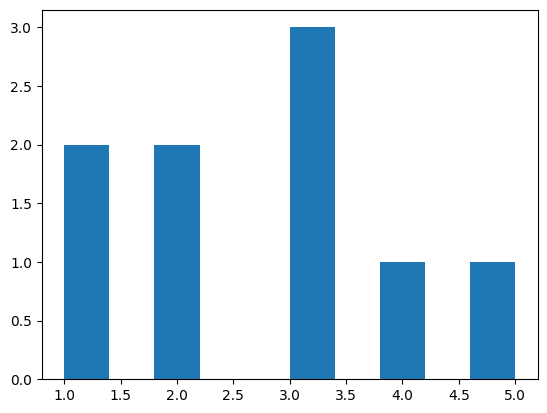

In [39]:
data = pd.Series([1,1,2,2,3,3,3,4,5])
data.hist(grid=False)
plt.show()


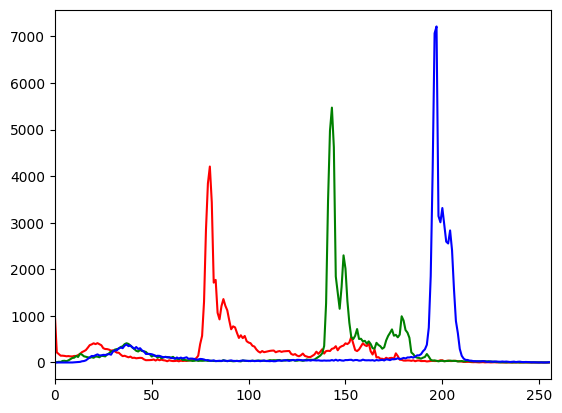

In [40]:
color = ("r","g","b")
for i ,channel in enumerate(colors):
    histogram = cv2.calcHist([image_rgb],
                             [i],
                             None,
                             [256],
                             [0,256])
    plt.plot(histogram,color=channel)
    plt.xlim([0,256])

plt.show()

8.15 : Using Pretrained Embeddings as Features

In [41]:
image_bgr = cv2.imread("images/plane.jpg",cv2.IMREAD_COLOR)
convert_tensor = transforms.ToTensor()
pytorch_image = convert_tensor(np.array(image_rgb))

model = models.resnet18(pretrained=True)
layer = model._modules.get('avgpool')
model.eval()
with torch.no_grad():
    embedding = model(pytorch_image.unsqueeze(0))

print(embedding.shape)

d:\New folder\Project\ProjectData\Data Science\datascience\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\New folder\Project\ProjectData\Data Science\datascience\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


torch.Size([1, 1000])


8.16 : Detecting Objects with OpenCv

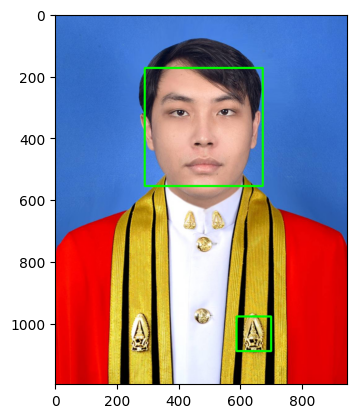

In [45]:
face_cascade = cv2.CascadeClassifier()
face_cascade.load(
    cv2.samples.findFile(
        "models/haarcascade_frontalface_default.xml"
    )
)
image_bgr = cv2.imread("images/11632.jpg",cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image_bgr,cv2.COLOR_BGR2RGB)
faces = face_cascade.detectMultiScale(image_rgb)
for (x,y,w,h) in faces:
    cv2.rectangle(image_rgb,(x,y),
                  (x+h,y+w),
                  (0,255,0),5)
    
plt.subplot(1,1,1)
plt.imshow(image_rgb)
plt.show()

8.17 : Classifying Images with Pytorch

In [47]:
# with urllib.request.urlopen(
#     "https://raw.githubusercontent.com/raghakot/keras-vis/master/resources/"
# ):
#     imagenet_class_index = json.load(url)

# model = resnet18(pretrained=True)
# image_bgr = cv2.imread("images/plane.jpg",cv2.IMREAD_COLOR)
# image_rgb = cv2.cvtColor(image_bgr,cv2.COLOR_BGR2RGB)

# convert_tensor = transforms.ToTensor()
# pytorch_image = convert_tensor(np.array(image_rgb))
# model.eval()
# prediction = model(pytorch_image.unsqueeze(0))
# _,index = torch.max(prediction,1)

# presentage = torch.nn.functional.softmax(prediction,dim=1)[0]*100
# print(imagenet_class_index[str(index.tolist()[0])][1],
#       presentage[index.tolist()[0]].item())